In [1]:
import sklearn
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [4]:
train_data,test_data, train_label, test_label = train_test_split(mnist.data, mnist.target, test_size = 0.25, random_state = 7)

In [5]:
print(train_data.shape, train_label.shape)
print(test_data.shape, test_label.shape)

(52500, 784) (52500,)
(17500, 784) (17500,)


In [6]:
# printing to see what an image looks like
print(train_data[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  76
 175 190 205 180 175 140  23   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 255 195 142 142 142  99 222 111   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 255  63   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  70 241   8   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  80 239   0   0   0   0   0   0   0   0   

In [7]:
# printing labels

print(train_label)

[ 5.  3.  3. ...,  8.  9.  1.]


<b> Doing cross validation to get the best parameters

In [8]:
knn = KNeighborsClassifier()

In [9]:
params = {'p' : (1,2), 'n_neighbors': (1,3,5,7,9)}

In [10]:
clf = GridSearchCV(knn,params,return_train_score= True)

In [11]:
print('Starting training')

Starting training


In [12]:
clf.fit(train_data,train_label)
print('Finished Training')

Finished Training


In [13]:
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform')

<b> Building up a classifier based on the best parameters we get above

In [14]:
final_knn = KNeighborsClassifier(n_neighbors=5,p=1)

In [15]:
final_knn.fit(train_data,train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform')

In [16]:
predictions = final_knn.predict(test_data)

In [17]:
accuracy = accuracy_score(test_label,predictions)*100
print(f'Accuracy of KNN classifier on test dataset is {accuracy: .2f}%')

Accuracy of KNN classifier on test dataset is  96.49%


In [18]:
print('Printing the classification Report')
print(classification_report(test_label,predictions))

Printing the classification Report
             precision    recall  f1-score   support

        0.0       0.98      0.99      0.98      1743
        1.0       0.94      0.99      0.96      1959
        2.0       0.98      0.96      0.97      1801
        3.0       0.96      0.96      0.96      1784
        4.0       0.98      0.96      0.97      1708
        5.0       0.96      0.96      0.96      1558
        6.0       0.98      0.99      0.98      1715
        7.0       0.95      0.97      0.96      1847
        8.0       0.99      0.92      0.95      1623
        9.0       0.95      0.95      0.95      1762

avg / total       0.97      0.96      0.96     17500



In [19]:
batchSize = 4
def imgshow(images,labels = None):
    fig = plt.figure(figsize = (10,10))
    for i in range(batchSize):
        ax = plt.subplot(1,batchSize,i+1)
        plt.imshow(images[i],cmap = 'gray')
        plt.axis('off')
        if labels is not None:
            plt.title(int(labels[i]))
    

In [20]:
#Plotting confusion matrix

def plot_conf_matrix(cnf_mat,classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cnf_mat = cnf_mat.astype('float')/cnf_mat.sum(axis = 1)
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix without normalization')
    
    plt.imshow(cnf_mat, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tickmarks = np.arange(len(classes))
    plt.xticks(tickmarks,classes, rotation = 45)
    plt.yticks(tickmarks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cnf_mat.max()/2
    for i,j in itertools.product(range(cnf_mat.shape[0]), range(cnf_mat.shape[1])):
        plt.text(j,i, format(cnf_mat[i,j],fmt), horizontalalignment = "center", 
                color = "white" if cnf_mat[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    

[ 4.  1.  7.  0.]


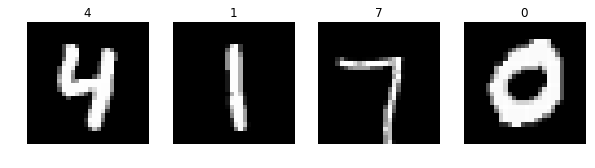

In [21]:
# Seeing the predictions on a few images

indices = np.random.choice(range(len(test_label)), size=4, replace = False)
imgshow(test_data[indices].reshape(4,28,28),predictions[indices])
print(test_label[indices])

<b> Confusion Matrix

In [22]:
conf_matrix = confusion_matrix(test_label,predictions)

In [23]:
conf_matrix

array([[1729,    1,    2,    0,    0,    3,    7,    1,    0,    0],
       [   0, 1948,    3,    0,    1,    0,    1,    5,    0,    1],
       [  13,   16, 1723,    5,    2,    3,    4,   35,    0,    0],
       [   1,   13,   12, 1714,    0,   16,    2,   14,    4,    8],
       [   0,   26,    1,    1, 1639,    0,    1,    5,    0,   35],
       [   5,    5,    2,   25,    5, 1488,   16,    1,    2,    9],
       [   7,    7,    0,    1,    1,    7, 1692,    0,    0,    0],
       [   2,   34,    4,    2,    2,    0,    0, 1786,    0,   17],
       [   6,   27,    6,   20,    7,   35,    7,    5, 1490,   20],
       [   6,    3,    2,   11,   24,    4,    0,   31,    4, 1677]])

Confusion Matrix without normalization


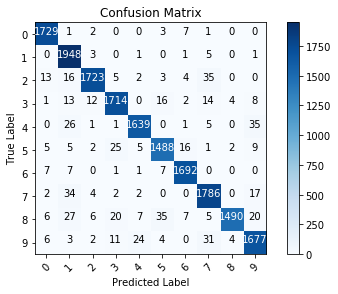

In [24]:
plot_conf_matrix(conf_matrix,list(range(10)),False)